In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

In [2]:
# Read table with (simplified) horizon symbols
path_horizons_simple = '..\\..\\..\\..\\data\\BGR_mini\\Vereinfachung_Horizontsymbole.csv'
df_simple = pd.read_csv(path_horizons_simple)
df_simple.rename(columns={"relevanter Anteil = was sinntragend und detektierbar ist - es sind nicht alles gültige Symbole": "relevanter Anteil"}, inplace=True)
df_simple.head()

,Horiz,Anzahl im Datensatz,relevanter Anteil,stark vereinfacht
0,Ap,1762,Ap,Ap
1,Bv,626,Bv,Bv
2,ilCv,620,ilC,Cv
3,elCv,500,elC,Cv
4,Ah,455,Ah,Ah


In [3]:
# Filter for symbols with at least n samples
df_simple = df_simple[df_simple['Anzahl im Datensatz'] > 10]

In [4]:
unique_labels = df_simple['relevanter Anteil'].unique()
sorted(unique_labels)

['Acp',
 'Acxh',
 'Aeh',
 'Ael',
 'Ael+Bt',
 'Ael-Bv',
 'Aep',
 'Ah',
 'Ah-Bv',
 'Al',
 'Al+Bt',
 'Al-Bv',
 'Al-Sw',
 'Ap',
 'Axh',
 'Axp',
 'Bcv',
 'Bh',
 'Bhs',
 'Bhv',
 'Bs',
 'Bsh',
 'Bsv',
 'Bt',
 'Bt+Al',
 'Bt-Sd',
 'Btv',
 'Bv',
 'Bv+elC',
 'Bv-Ael',
 'Bv-Al',
 'Bv-Cv',
 'Bv-Sd',
 'Bv-Sw',
 'Bv-elC',
 'Bv-ilC',
 'Bvt',
 'C',
 'Cbtv',
 'Cj',
 'Cv',
 'Cv-Bv',
 'E',
 'Gkso',
 'Go',
 'Go-M',
 'Go-ilC',
 'Gor',
 'Gr',
 'Gro',
 'Gw',
 'Hr',
 'Hv',
 'Hw',
 'M',
 'M-Go',
 'M-Gro',
 'M-Sw',
 'Mc',
 'P',
 'P-Sd',
 'R',
 'Sd',
 'Sd-Bt',
 'Sd-Btv',
 'Sd-Bv',
 'Sd-ilC',
 'Sd-lC',
 'Ssw',
 'Sswd',
 'Sw',
 'Sw-Ah',
 'Sw-Al',
 'Sw-Ap',
 'Sw-Bt',
 'Sw-Bv',
 'Sw-Go',
 'Sw-M',
 'Sw-ilC',
 'aelC',
 'bE',
 'cC',
 'clC',
 'cmC',
 'elC',
 'elC-P',
 'elCc',
 'emC',
 'iC',
 'ilC',
 'ilC-Bv',
 'ilC-Sd',
 'ilCbtv',
 'imC',
 'imCv',
 'lC',
 'mCv',
 'tGo',
 'tGr',
 'tGro']

In [5]:
len(unique_labels)

100

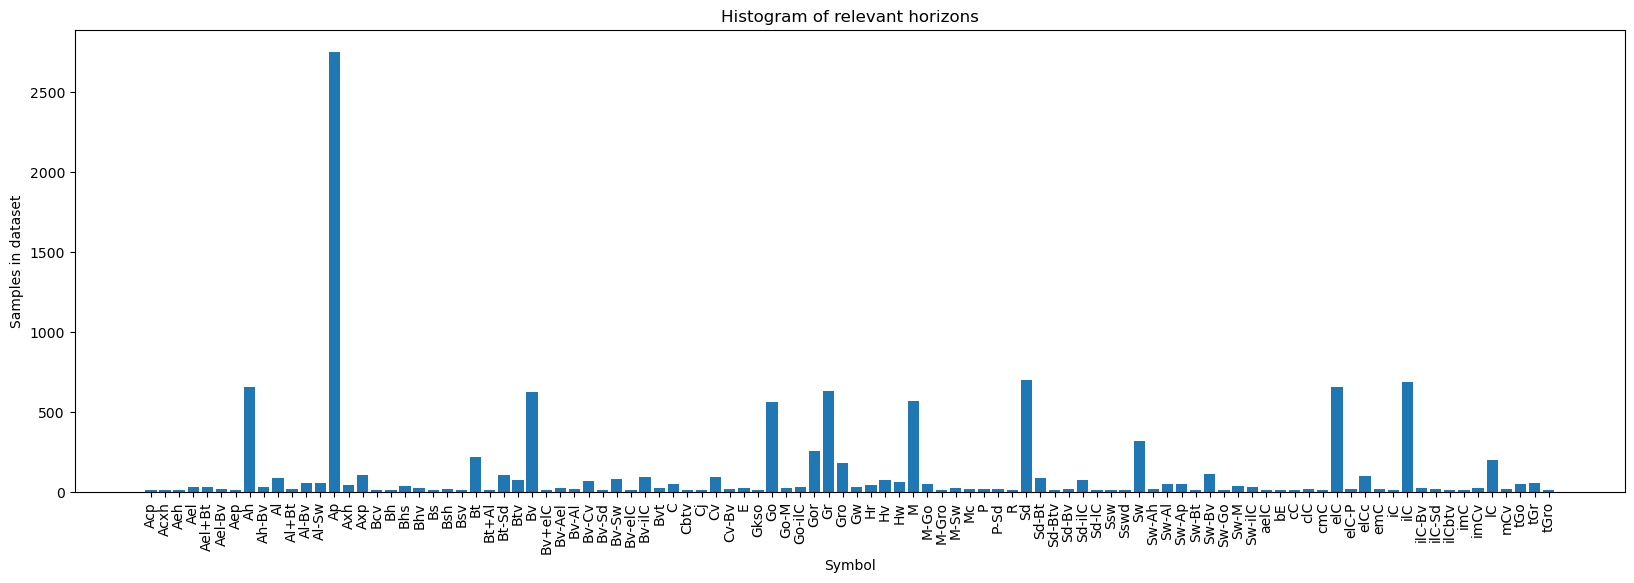

In [6]:
# Histogram of unique labels
label_counts = df_simple.groupby('relevanter Anteil')['Anzahl im Datensatz'].sum()

plt.figure(figsize=(20,6))
plt.bar(label_counts.index, label_counts)
plt.xlabel('Symbol')
plt.ylabel('Samples in dataset')
plt.title('Histogram of relevant horizons')
plt.xticks(rotation=90)
plt.show()

In [7]:
# Define the taxonomy as a graph
taxonomy = nx.DiGraph()

# Root categories
taxonomy.add_edge("Root", "A")
taxonomy.add_edge("Root", "B")
taxonomy.add_edge("Root", "C")
taxonomy.add_edge("Root", "E")
taxonomy.add_edge("Root", "G")
taxonomy.add_edge("Root", "H")
taxonomy.add_edge("Root", "M")
taxonomy.add_edge("Root", "P")
taxonomy.add_edge("Root", "R")
taxonomy.add_edge("Root", "S")

In [8]:
# A Horizons subcategories
a_horizons = ["Ap", "Ah", "Al", "Axp", "Axh", "Acp", "Aep", "Aeh", "Ael", "Acxh"]
for label in a_horizons:
    taxonomy.add_edge("A", label)

# Extend with modifiers
Ael_modifiers = ["Ael.", "Ael+Bt", "Ael-Bv"]
for mod in Ael_modifiers:
    taxonomy.add_edge("Ael", mod)

Ap_modifiers = ["Ap.", "Ap-Bt"]
for mod in Ap_modifiers:
    taxonomy.add_edge("Ap", mod)

Ah_modifiers = ["Ah.", "Ah-Bv"]
for mod in Ah_modifiers:
    taxonomy.add_edge("Ah", mod)

Al_modifiers = ["Al.", "Al+Bt", "Al-Bv", "Al-Sw"]
for mod in Al_modifiers:
    taxonomy.add_edge("Al", mod)

In [9]:
# B Horizons subcategories
b_horizons = ["Bv", "Bt", "Bhs", "Bh", "Bs", "Bhv", "Btv", "Bsh", "Bcv", "Bsv", "Bvt"]
for label in b_horizons:
    taxonomy.add_edge("B", label)
    
# Extend with modifiers
Bv_modifiers = ["Bv.", "Bv-ilC", "Bv-elC", "Bv+elC", "Bv-Al", "Bv-Ael", "Bv-Cv", "Bv-Sd", "Bv-Sw"]
for mod in Bv_modifiers:
    taxonomy.add_edge("Bv", mod)

Bt_modifiers = ["Bt.", "Bt+Al", "Bt-Sd"]
for mod in Bt_modifiers:
    taxonomy.add_edge("Bt", mod)

In [10]:
# C Horizons subcategories
c_horizons = ["C.", "Cv", "Cbtv", "Cj", "cC", "clC", "iC", "ilC", "lC", "ilCbtv", "elC", "emC", "imC", "mCv", "imCv", "cmC", "elCc", "aelC"]
for label in c_horizons:
    taxonomy.add_edge("C", label)

# Extend with modifiers
Cv_modifiers = ["Cv.", "Cv-Bv"]
for mod in Cv_modifiers:
    taxonomy.add_edge("Cv", mod)

ilC_modifiers = ["ilC.", "ilC-Bv", "ilC-Sd"]
for mod in ilC_modifiers:
    taxonomy.add_edge("ilC", mod)

elC_modifiers = ["elC.", "elC-P"]
for mod in elC_modifiers:
    taxonomy.add_edge("elC", mod)

In [11]:
# E Horizons subcategories
e_horizons = ["E.", "bE"]
for label in e_horizons:
    taxonomy.add_edge("E", label)

In [12]:
# G Horizons subcategories
g_horizons = ["Gr", "Gro", "Gor", "Go", "Gw", "tGo", "tGr", "tGro", "Gkso"]
for label in g_horizons:
    taxonomy.add_edge("G", label)

# Extend with modifiers
Go_modifiers = ["Go.", "Go-elC", "Go-ilC", "Go-M"]
for mod in Go_modifiers:
    taxonomy.add_edge("Go", mod)

In [13]:
# H Horizons subcategories
h_horizons = ["Hr", "Hw", "Hv"]
for label in h_horizons:
    taxonomy.add_edge("H", label)

In [14]:
# M Horizons subcategories
m_horizons = ["M.", "Mc"]
for label in m_horizons:
    taxonomy.add_edge("M", label)

# Extend with modifiers
M_modifiers = ["M.", "M-Go", "M-Gro", "M-Sw"]
for mod in M_modifiers:
    taxonomy.add_edge("M", mod)

In [15]:
# P Horizons subcategories
p_horizons = ["P.", "P-Sd"]
for label in p_horizons:
    taxonomy.add_edge("P", label)

In [16]:
# R Horizon
taxonomy.add_edge("R", "R.")

In [17]:
# S Horizons subcategories
s_horizons = ["Sd", "Sw", "Ssw", "Sswd"]
for label in s_horizons:
    taxonomy.add_edge("S", label)

# Extend with modifiers
Sd_modifiers = ["Sd.", "Sd-ilC", "Sd-lC", "Sd-Bt", "Sd-Btv", "Sd-Bv"]
for mod in Sd_modifiers:
    taxonomy.add_edge("Sd", mod)

Sw_modifiers = ["Sw.", "Sw-Ah", "Sw-Al", "Sw-ilC", "Sw-Cv", "Sw-Bt", "Sw-Bv", "Sw-Ap", "Sw-M", "Sw-Go"]
for mod in Sw_modifiers:
    taxonomy.add_edge("Sw", mod)

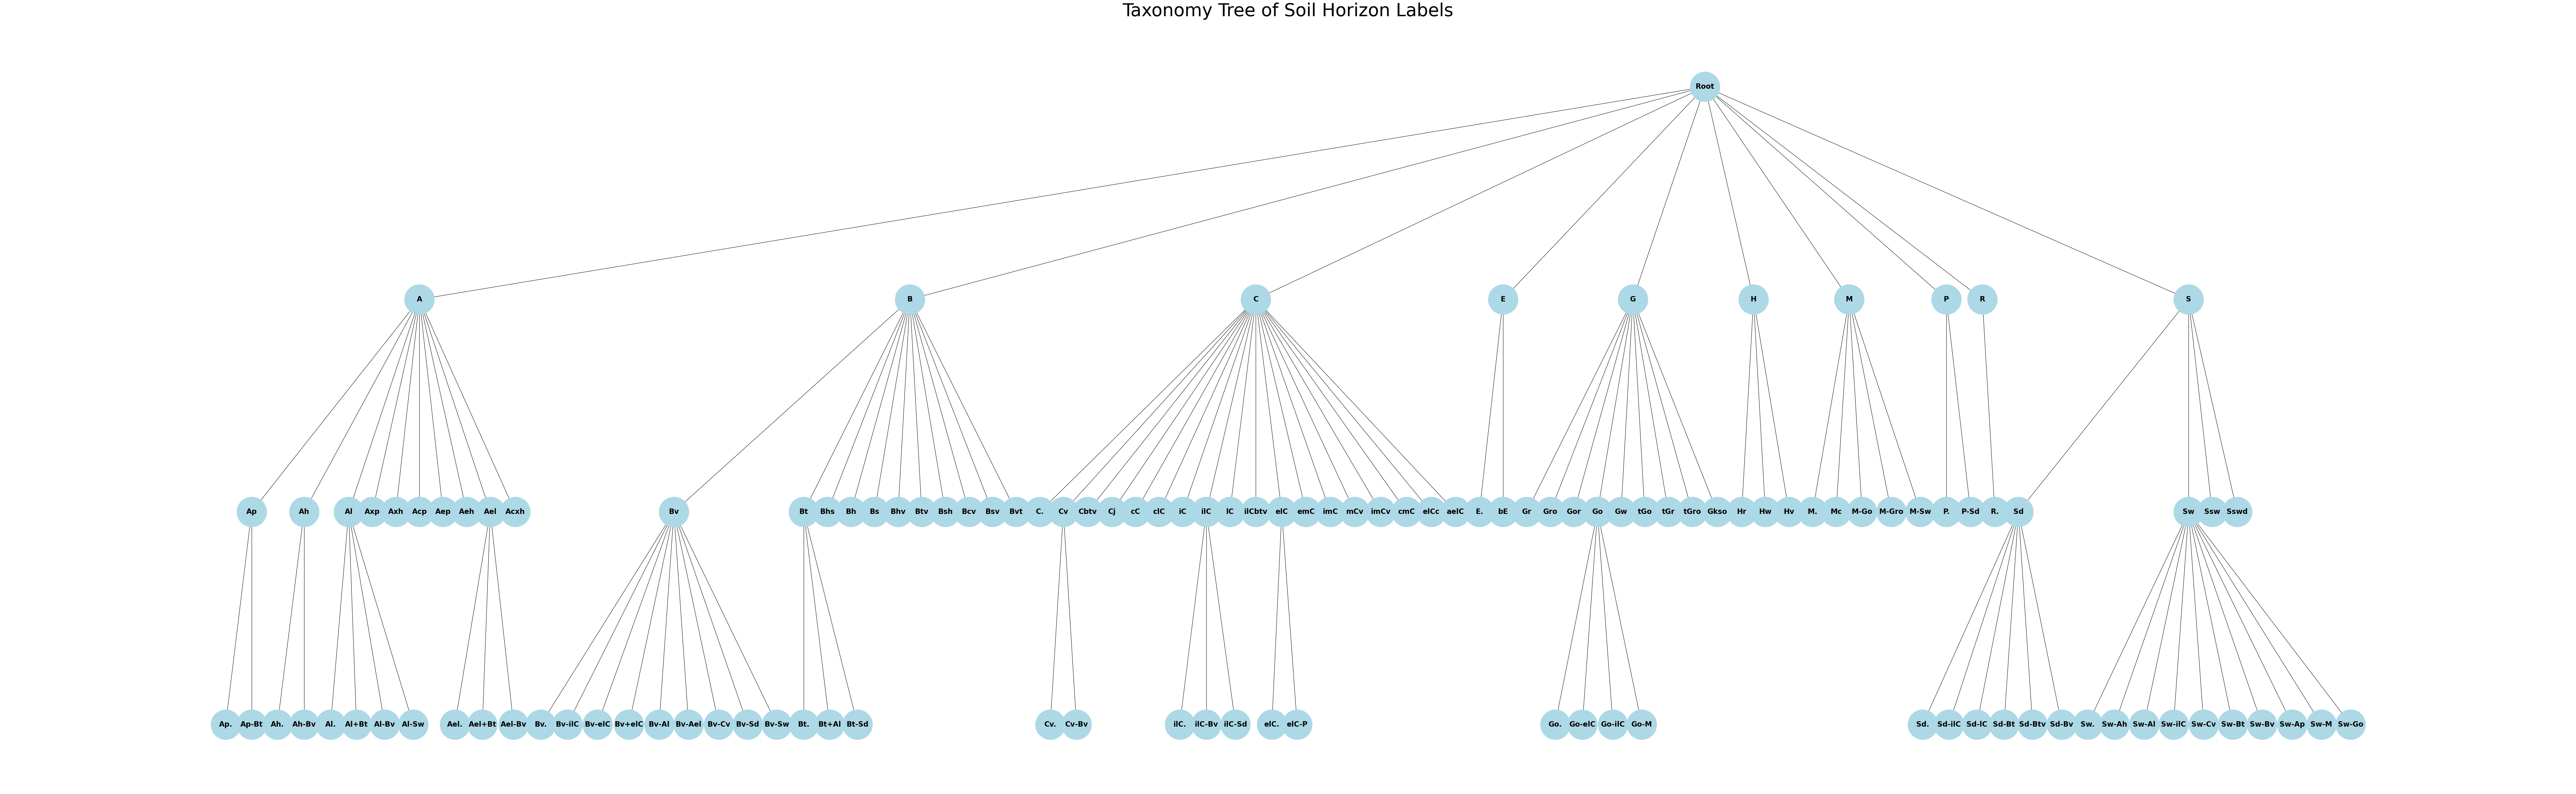

In [29]:
# Note: Bindestrich '-' heißt Übergangshorizont (evtl vermischt vom ersten zum zweiten)
#       Plus '+' heißt Verzahnungshorizont (zwischen dem ersten und dem zweiten, ohne Vermischung)
# ToDo: Bei beiden Zusammensetzungen ist die Reihenfolge relevant, oder?
#
# ToDo: Was tun bei Zusammensetzungen z.B. Aep = Ae + Ap?
#
# ToDo: combine several horizons into a node 'Others'? Such as E, H, P, R
#
# ToDo: Self-reference in nodes avoided by '.' - any better solution?


# Create the plot
fig = plt.figure(figsize=(100, 30))
pos = nx.nx_agraph.graphviz_layout(taxonomy, prog="dot")

# Draw the graph
nx.draw(taxonomy, pos, with_labels=True, arrows=False, node_size=7000, node_color="lightblue", font_size=20, font_weight="bold")

plt.title("Taxonomy Tree of Soil Horizon Labels", fontsize=50)
plt.show()
fig.savefig("..\\..\\figures\\horizons_tree.pdf")